<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></span></li><li><span><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li></ul></li><li><span><a href="#Genomic-overlap-in-combo-network" data-toc-modified-id="Genomic-overlap-in-combo-network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Genomic overlap in combo network</a></span></li><li><span><a href="#For-Lila" data-toc-modified-id="For-Lila-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>For Lila</a></span></li><li><span><a href="#Localization" data-toc-modified-id="Localization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Localization</a></span><ul class="toc-item"><li><span><a href="#FeatureCounts-example" data-toc-modified-id="FeatureCounts-example-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>FeatureCounts example</a></span></li><li><span><a href="#unspliced-example" data-toc-modified-id="unspliced-example-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>unspliced example</a></span></li><li><span><a href="#real-data" data-toc-modified-id="real-data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>real data</a></span><ul class="toc-item"><li><span><a href="#Extract-right-transcripts" data-toc-modified-id="Extract-right-transcripts-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Extract right transcripts</a></span></li><li><span><a href="#Clean-data-file" data-toc-modified-id="Clean-data-file-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Clean data file</a></span></li><li><span><a href="#plotting" data-toc-modified-id="plotting-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>plotting</a></span></li></ul></li><li><span><a href="#Unspliced-length" data-toc-modified-id="Unspliced-length-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Unspliced length</a></span></li></ul></li><li><span><a href="#log2-transform" data-toc-modified-id="log2-transform-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>log2 transform</a></span></li><li><span><a href="#Protein-binding" data-toc-modified-id="Protein-binding-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Protein binding</a></span></li></ul></div>

# Watermark

In [4]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Jessime Kirk Tue Oct 09 2018 

CPython 3.6.6
IPython 7.0.1

numpy 1.15.2
scipy 1.1.0
pandas 0.23.4
sklearn 0.20.0
matplotlib 3.0.0
seaborn 0.9.0
networkx 2.2
notebook 5.7.0
jupyter_contrib_nbextensions 0.5.0

compiler   : GCC 7.2.0
system     : Linux
release    : 4.15.0-36-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

import pybedtools

from contextlib import ExitStack
import itertools

from scipy.stats import pearsonr

### Autoimport my code

In [2]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [3]:
cd ..

/home/jessime/Code/kmers3


In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

### Plotting

In [6]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Genomic overlap in combo network

In June, I was beginning to use `lastz` to figure out where we had repeats. As an even similar version of that, I'm going to measure what percentage of our edges have genomic overlap. I don't know if we care if transposable elements or something similar are expressed from different loci. 

In [7]:
v26_graph = '/home/jessime/Research/mrna_lncrna/v26_combo_p1_t100.gml'
v26_graph = nx.read_gml(v26_graph, label='id')

In [15]:
v26_graph.nodes[0]

{'name': 'MIR1302-2HG-UN', 'community': 1}

In [22]:
for i, e in enumerate(v26_graph.edges):
    print((v26_graph.node[e[0]]['name'], v26_graph.node[e[1]]['name']))
    if i == 10:
        break

('MIR1302-2HG-UN', 'LINC01351-UN')
('MIR1302-2HG-UN', 'RP11-127O4.3-UN')
('MIR1302-2HG-UN', 'RP1-197B17.7-UN')
('MIR1302-2HG-UN', 'RP11-357K6.1-UN')
('MIR1302-2HG-UN', 'RP11-98F14.12-UN')
('MIR1302-2HG-UN', 'RP6-65G23.5-UN')
('MIR1302-2HG-UN', 'AC140725.4-UN')
('MIR1302-2HG-UN', 'AC008993.3-UN')
('MIR1302-2HG-UN', 'SPACA6P-AS-UN')
('MIR1302-2HG-UN', 'AC010745.1-UN')
('MIR1302-2HG-UN', 'CH507-513H4.1-UN')


In [11]:
%aimport gtf

In [90]:
v26_rnas = ['/home/jessime/Research/mrna_lncrna/v26_lnc_unspliced.gtf',
            '/home/jessime/Research/mrna_lncrna/v26_lnc_spliced001.gtf',
            '/home/jessime/Research/mrna_lncrna/v26_pc_unspliced.gtf',
            '/home/jessime/Research/mrna_lncrna/v26_pc_spliced001.gtf']
spliced_ls = [False, True, False, True]

v26_graph_df = []
for gtf_path, spliced in zip(v26_rnas, spliced_ls):
    maker = gtf.Maker(gtf_path)
    maker.inGTF.head()
    maker.append_attribute(col=3)
    suffix = '-SP' if spliced else '-UN'
    maker.expandedDF['gene_name'] += suffix
    maker.expandedDF.rename(columns={9:'gene_id'}, inplace=True)
    v26_graph_df.append(maker.expandedDF)
v26_graph_df = pd.concat(v26_graph_df, sort=False)

print(v26_graph_df.shape)
#v26_graph_df.set_index('gene_name', inplace=True)
v26_graph_df.head()

(65679, 11)


seqname  source     feature   start     end score strand frame  \
1     chr1  HAVANA  transcript   29554   31109     .      +     .   
4     chr1  HAVANA  transcript   34554   36081     .      -     .   
7     chr1  HAVANA  transcript   89295  133723     .      -     .   
10    chr1  HAVANA  transcript   89551   91105     .      -     .   
13    chr1  HAVANA  transcript  139790  140339     .      -     .   

                                            attribute            gene_id  \
1   gene_id "ENSG00000243485.5"; transcript_id "UN...  ENSG00000243485.5   
4   gene_id "ENSG00000237613.2"; transcript_id "UN...  ENSG00000237613.2   
7   gene_id "ENSG00000238009.6"; transcript_id "UN...  ENSG00000238009.6   
10  gene_id "ENSG00000239945.1"; transcript_id "UN...  ENSG00000239945.1   
13  gene_id "ENSG00000239906.1"; transcript_id "UN...  ENSG00000239906.1   

           gene_name  
1     MIR1302-2HG-UN  
4         FAM138A-UN  
7    RP11-34P13.7-UN  
10   RP11-34P13.8-UN  
13  RP11-34P13.14-UN

In [88]:
v26_graph_df['gene_name'].value_counts().head()

LYNX1-UN       3
CYB561D2-UN    2
RABGEF1-SP     2
CRLF2-UN       2
VAMP7-UN       2
Name: gene_name, dtype: int64

Great, so the gene names aren't unique. Should have guessed. :(

Let's try building a unique set of names.

In [68]:
%aimport fasta

In [75]:
v26_rnas = ['/home/jessime/Research/mrna_lncrna/v26_lnc_unspliced.fa',
              '/home/jessime/Research/mrna_lncrna/v26_lnc_spliced001.fa',
              '/home/jessime/Research/mrna_lncrna/v26_pc_unspliced.fa',
              '/home/jessime/Research/mrna_lncrna/v26_pc_spliced001.fa']
spliced_ls = [False, True, False, True]

all_names = []
for v26, spliced in zip(v26_rnas, spliced_ls):
    extracter = fasta.Extracter(infasta=v26)
    suffix = '-SP' if spliced else '-UN'
    names_ls = [n.split()[0].strip('>')+suffix for n in extracter.names]
    all_names += names_ls

In [79]:
print(len(all_names))
print(len(set(all_names)))
print(all_names[:5])
print(all_names[-5:])

65679
65679
['UNSPLICED2-UN', 'UNSPLICED3-UN', 'UNSPLICED4-UN', 'UNSPLICED5-UN', 'UNSPLICED6-UN']
['ENST00000382314.6-SP', 'ENST00000382287.5-SP', 'ENST00000302805.7_PAR_Y-SP', 'ENST00000262640.11_PAR_Y-SP', 'ENST00000369423.7_PAR_Y-SP']


That kind of works, but it isn't really what I want. I'm going to index on numbers and then check after.

In [96]:
v26_graph_df['transcript_id'] = all_names
#v26_graph_df.set_index('transcript_id', inplace=True)
v26_graph_df.reset_index(inplace=True, drop=True)
v26_graph_df.head()

seqname  source     feature   start     end score strand frame  \
0    chr1  HAVANA  transcript   29554   31109     .      +     .   
1    chr1  HAVANA  transcript   34554   36081     .      -     .   
2    chr1  HAVANA  transcript   89295  133723     .      -     .   
3    chr1  HAVANA  transcript   89551   91105     .      -     .   
4    chr1  HAVANA  transcript  139790  140339     .      -     .   

                                           attribute            gene_id  \
0  gene_id "ENSG00000243485.5"; transcript_id "UN...  ENSG00000243485.5   
1  gene_id "ENSG00000237613.2"; transcript_id "UN...  ENSG00000237613.2   
2  gene_id "ENSG00000238009.6"; transcript_id "UN...  ENSG00000238009.6   
3  gene_id "ENSG00000239945.1"; transcript_id "UN...  ENSG00000239945.1   
4  gene_id "ENSG00000239906.1"; transcript_id "UN...  ENSG00000239906.1   

          gene_name  transcript_id  
0    MIR1302-2HG-UN  UNSPLICED2-UN  
1        FAM138A-UN  UNSPLICED3-UN  
2   RP11-34P13.7-UN  UNSPLICED4-UN  
3   RP11-34P13.8-UN  UNSPLICED5-UN  
4  RP11-34P13.14-UN  UNSPLICED6-UN

... figures crossed I have enough information in this dataframe to figure out what's going on in the backend.

In [100]:
def intersects(row1, row2):
    if row1.seqname != row2.seqname:
        return False
    gtf_intersect = (((row2.start <= row1.start) &
                      (row1.start <= row2.end)) |
                     ((row1.start <= row2.start) &
                      (row2.start <= row1.end)))
    return gtf_intersect

In [110]:
class Row:
    
    def __init__(self, seqname, start, end, transcript_id=None):
        self.seqname = seqname
        self.start = start
        self.end = end
        self.transcript_id = transcript_id

In [55]:
r1 = Row('chr1', 0, 100)
r2 = Row('chr1', 200, 300)
assert intersects(r1, r2) == False
assert intersects(r2, r1) == False
r3 = Row('chr1', -100, -50)
assert intersects(r1, r3) == False
assert intersects(r3, r1) == False
r4 = Row('chr1', -1, 1)
assert intersects(r1, r4)
assert intersects(r4, r1)
r5 = Row('chr1', 10, 20)
assert intersects(r1, r5)
assert intersects(r5, r1)
r6 = Row('chr1', -1000, 1000)
assert intersects(r1, r6)
assert intersects(r6, r1)
r7 = Row('chr1', 50, 150)
assert intersects(r1, r7)
assert intersects(r7, r1)

Let's test just 100 edges or so:

In [108]:
edges_intersect = []
for i, e in tqdm_notebook(enumerate(v26_graph.edges)):
    #node1 = v26_graph.node[e[0]]['name']
    #node2 = v26_graph.node[e[1]]['name']
    row1 = v26_graph_df.loc[e[0]]
    row2 = v26_graph_df.loc[e[1]]
    nodes_intersect = intersects(row1, row2)
    data = {'node1': e[0],
            'node1_gene': row1.gene_name,
            'node1_chr': row1.seqname,
            'node1_start': row1.start,
            'node1_end': row1.end,
            'node2': e[1],
            'node2_gene': row2.gene_name,
            'node2_chr': row2.seqname,
            'node2_start': row2.start,
            'node2_end': row2.end,
            'nodes_intersect': nodes_intersect
            }
    edges_intersect.append(data)
    if i == 100:
        break
edges_intersect = pd.DataFrame(edges_intersect)
print(edges_intersect.shape)
edges_intersect.head()

(101, 11)


node1 node1_chr  node1_end      node1_gene  node1_start  node2 node2_chr  \
0      0      chr1      31109  MIR1302-2HG-UN        29554    919      chr1   
1      0      chr1      31109  MIR1302-2HG-UN        29554   1697      chr2   
2      0      chr1      31109  MIR1302-2HG-UN        29554   2878      chr3   
3      0      chr1      31109  MIR1302-2HG-UN        29554   3320      chr4   
4      0      chr1      31109  MIR1302-2HG-UN        29554   3931      chr5   

   node2_end       node2_gene  node2_start  nodes_intersect  
0  190480735     LINC01351-UN    190478551            False  
1  102440475    AC007278.3-UN    102438713            False  
2  175941037  RP11-809F4.3-UN    175938929            False  
3   88331421   RP11-10L7.1-UN     88284942            False  
4   38153715     LINC02119-UN     38148480            False

In [109]:
edges_intersect[edges_intersect['nodes_intersect']]

node1 node1_chr  node1_end      node1_gene  node1_start  node2 node2_chr  \
17      0      chr1      31109  MIR1302-2HG-UN        29554  15599      chr1   
63      1      chr1      36081      FAM138A-UN        34554  15600      chr1   

    node2_end      node2_gene  node2_start  nodes_intersect  
17      31097  MIR1302-2HG-SP        29554             True  
63      36081      FAM138A-SP        34554             True

Before doing the whole loop, let's make things a little bit faster:

In [111]:
dict_Rows = {i:Row(row.seqname, row.start, row.end, row.transcript_id) for i, row in v26_graph_df.iterrows()}

In [113]:
dict_Rows[0].transcript_id

'UNSPLICED2-UN'

In [118]:
edges_intersect = []
for n0, n1 in tqdm_notebook(v26_graph.edges):
    #node1 = v26_graph.node[e[0]]['name']
    #node2 = v26_graph.node[e[1]]['name']
    row1 = dict_Rows[n0]
    row2 = dict_Rows[n1]
    nodes_intersect = intersects(row1, row2)
    data = {'node1': n0,
            'node1_transcript': row1.transcript_id,
            'node1_chr': row1.seqname,
            'node1_start': row1.start,
            'node1_end': row1.end,
            'node2': n1,
            'node2_transcript': row2.transcript_id,
            'node2_chr': row2.seqname,
            'node2_start': row2.start,
            'node2_end': row2.end,
            'nodes_intersect': nodes_intersect
            }
    edges_intersect.append(data)
edges_intersect = pd.DataFrame(edges_intersect)
print(edges_intersect.shape)
edges_intersect.head()

(3000822, 11)


node1 node1_chr  node1_end  node1_start node1_transcript  node2 node2_chr  \
0      0      chr1      31109        29554    UNSPLICED2-UN    919      chr1   
1      0      chr1      31109        29554    UNSPLICED2-UN   1697      chr2   
2      0      chr1      31109        29554    UNSPLICED2-UN   2878      chr3   
3      0      chr1      31109        29554    UNSPLICED2-UN   3320      chr4   
4      0      chr1      31109        29554    UNSPLICED2-UN   3931      chr5   

   node2_end  node2_start      node2_transcript  nodes_intersect  
0  190480735    190478551      UNSPLICED2575-UN            False  
1  102440475    102438713     UNSPLICED17729-UN            False  
2  175941037    175938929  ENST00000623870.1-UN            False  
3   88331421     88284942     UNSPLICED21445-UN            False  
4   38153715     38148480     UNSPLICED22371-UN            False

10s instead of 22mins. Pretty good.

In [119]:
nodes_intersect_df = edges_intersect[edges_intersect['nodes_intersect']]
print(nodes_intersect_df.shape)
nodes_intersect_df.head()

(3794, 11)


node1 node1_chr  node1_end  node1_start node1_transcript  node2  \
17       0      chr1      31109        29554    UNSPLICED2-UN  15599   
63       1      chr1      36081        34554    UNSPLICED3-UN  15600   
101      2      chr1     133723        89295    UNSPLICED4-UN      3   
114      2      chr1     133723        89295    UNSPLICED4-UN  15601   
115      2      chr1     133723        89295    UNSPLICED4-UN  15602   

    node2_chr  node2_end  node2_start      node2_transcript  nodes_intersect  
17       chr1      31097        29554  ENST00000473358.1-SP             True  
63       chr1      36081        34554  ENST00000417324.1-SP             True  
101      chr1      91105        89551         UNSPLICED5-UN             True  
114      chr1     120932        89295  ENST00000466430.5-SP             True  
115      chr1      91105        89551  ENST00000495576.1-SP             True

watch out the order of the columns is a little wonky since its coming from a dict.

In [120]:
3794/3000822

0.0012643202429201065

# For Lila

>Mauro,
>
>That is fantastic! I am very curious to see how/if this will work.
>
>Since we are using supervised machine learning, we need a "training set” to  train the classifier.
>That is, we would need at least some of the sequences to  also have a label (maybe as a separate field?) indicating the “class” they belong to.  In our previous studies, this label was the species/genus/family/etc  taxonomic label of that particular genomic fragment, in this case maybe it is the functionality?
>
>If all sequences are labelled, that is of course very good, we can still test the classification accuracy by using 9/10 of the sequences as training set, and the remaining 1/10 as testing set.
>
>I look forward to receiving your datasets!
>
>Best
>
>lila

Let's start with the easiest file first:

In [122]:
!cp /home/jessime/Research/proteins/K562_p0.13_X_y_df.csv \
/home/jessime/Research/for_others/Lila/K562_X_y.csv

Now I need to build a fasta file for just these lncRNAs:

In [123]:
protein_binding = '/home/jessime/Research/for_others/Lila/K562_X_y.csv'
protein_binding = pd.read_csv(protein_binding, index_col=0)
protein_binding.head()

group  0.0  1.0  2.0  3.0  4.0  intercept    Length  \
RP11-394O4.5-001     4.0    0    0    0    0    1          1  7.843456   
RP3-406P24.3-001     5.0    0    0    0    0    0          1  5.342334   
RP11-348J12.5-001    2.0    0    0    1    0    0          1  6.340359   
CTBP1-AS2-001        2.0    0    0    1    0    0          1  6.605298   
RP11-11N5.1-001      5.0    0    0    0    0    0          1  6.206576   

                   Expression  AARS   ...    U2AF1  U2AF2  UCHL5  UPF1  XRCC6  \
RP11-394O4.5-001     0.987904   0.0   ...      0.0    0.0    0.0   0.0    0.0   
RP3-406P24.3-001     3.834387   0.0   ...      0.0    1.0    0.0   0.0    0.0   
RP11-348J12.5-001    1.104706   0.0   ...      0.0    0.0    0.0   1.0    0.0   
CTBP1-AS2-001        0.000000   0.0   ...      0.0    0.0    1.0   0.0    0.0   
RP11-11N5.1-001      3.654403   0.0   ...      0.0    0.0    1.0   1.0    1.0   

                   XRN2  YBX3  YWHAG  ZNF622  ZRANB2  
RP11-394O4.5-001    0.0   0.0    0.0     0.0     0.0  
RP3-406P24.3-001    0.0   0.0    0.0     0.0     0.0  
RP11-348J12.5-001   0.0   0.0    0.0     0.0     0.0  
CTBP1-AS2-001       0.0   1.0    1.0     1.0     0.0  
RP11-11N5.1-001     0.0   1.0    0.0     0.0     0.0  

[5 rows x 95 columns]

In [124]:
%aimport fasta

In [126]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'
outfasta = '/home/jessime/Research/for_others/Lila/K562_eCLIP.fa'
maker = fasta.Maker(infasta, outfasta)

In [128]:
_ = maker.filter_name(protein_binding.index.values)

In [129]:
!grep ">" /home/jessime/Research/for_others/Lila/K562_eCLIP.fa | head -n 10

>ENST00000602315.1|ENSG00000269936.3|OTTHUMG00000184101.1|OTTHUMT00000468029.1|RP11-394O4.5-001|RP11-394O4.5|2549|
>ENST00000415144.1|ENSG00000230648.1|OTTHUMG00000014156.1|OTTHUMT00000039703.1|RP3-406P24.3-001|RP3-406P24.3|209|
>ENST00000624651.1|ENSG00000279607.1|OTTHUMG00000189113.1|OTTHUMT00000478831.1|RP11-348J12.5-001|RP11-348J12.5|567|
>ENST00000507044.1|ENSG00000196810.4|OTTHUMG00000160166.2|OTTHUMT00000359476.1|CTBP1-AS2-001|CTBP1-AS2|739|
>ENST00000507644.2|ENSG00000250829.2|OTTHUMG00000160310.2|OTTHUMT00000360166.2|RP11-11N5.1-001|RP11-11N5.1|496|
>ENST00000523226.1|ENSG00000253532.1|OTTHUMG00000164700.1|OTTHUMT00000379829.1|CTD-2340D6.1-001|CTD-2340D6.1|595|
>ENST00000620845.1|ENSG00000278716.1|OTTHUMG00000187072.1|OTTHUMT00000474370.1|LA16c-352F7.1-001|LA16c-352F7.1|1019|
>ENST00000623428.1|ENSG00000280245.1|OTTHUMG00000179637.1|OTTHUMT00000447474.1|RP11-466A19.4-001|RP11-466A19.4|1078|
>ENST00000441004.4|ENSG00000231346.4|OTTHUMG00000011958.2|OTTHUMT00000033068.2|LINC0116

In [130]:
!wc -l /home/jessime/Research/for_others/Lila/K562_eCLIP.fa

6554 /home/jessime/Research/for_others/Lila/K562_eCLIP.fa


In [131]:
6554/2

3277.0

In [132]:
protein_binding.shape

(3277, 95)

The other thing I want to get her is the localization data. That's going to be a bit trickier.

In [133]:
!wc -l /home/jessime/Research/localization/percent_nuc_stats.csv

15755 /home/jessime/Research/localization/percent_nuc_stats.csv


In [134]:
!mv /home/jessime/Desktop/41588_2018_207_MOESM4_ESM.xlsx \
/home/jessime/Research/localization/lnc_local_published.xlsx

In [155]:
local = '/home/jessime/Research/localization/lnc_local_published.xlsx'
local = pd.read_excel(local, index_col=0)
local.head()

Community                                          Top 6mers  \
LncRNA                                                                          
RP11-34P13.3-001         3  {'CGCCCC': 6.30078125, 'TACGCC': 6.41796875, '...   
FAM138A-001           Null  {'CGTAAA': 3.17578125, 'CACCTC': 3.39453125, '...   
RP11-34P13.7-001      Null  {'GACTGT': 4.2265625, 'GGTTAA': 4.26171875, 'G...   
RP11-34P13.7-201      Null  {'ATAGAT': 4.89453125, 'GCTCGA': 5.07421875, '...   
RP11-34P13.8-001      Null  {'ATTGGC': 4.0078125, 'ATTGGG': 4.15625, 'TATT...   

                  Polysomes  \
LncRNA                        
RP11-34P13.3-001        NaN   
FAM138A-001             NaN   
RP11-34P13.7-001        0.0   
RP11-34P13.7-201        NaN   
RP11-34P13.8-001        0.0   

                                                           Proteins  \
LncRNA                                                                
RP11-34P13.3-001  {'BCCIP', 'HNRNPK', 'SERBP1', 'CDC40', 'FXR2',...   
FAM138A-001                                                     NaN   
RP11-34P13.7-001                                                NaN   
RP11-34P13.7-201                                                NaN   
RP11-34P13.8-001                                                NaN   

                 Localization  
LncRNA                         
RP11-34P13.3-001          NaN  
FAM138A-001               NaN  
RP11-34P13.7-001        N & C  
RP11-34P13.7-201          NaN  
RP11-34P13.8-001        N & C

In [156]:
local['Localization'].value_counts()

N & C    3786
C         427
N         360
Name: Localization, dtype: int64

In [157]:
local = local[['Localization']]
print(local.shape)

(15953, 1)


In [159]:
outfile = '/home/jessime/Research/for_others/Lila/localization.csv'
local.to_csv(outfile)

In [161]:
!cp /home/jessime/Research/v22_transcripts01.fa \
/home/jessime/Research/for_others/Lila/localization.fa

# Localization

I'm considering upgrading the localization datasets. Just as a reminder, the old files came from:

http://hgdownload.cse.ucsc.edu/goldenPath/hg19/encodeDCC/wgEncodeCshlLongRnaSeq/

and all of the urls can be found at:

'/home/jessime/Research/localization/ucsc_encode_urls.txt'

There are similiar and newer data sets here:

https://www.encodeproject.org/matrix/?type=Experiment&assay_slims=Transcription&biosample_type=cell+line&assay_title=total+RNA-seq&assay_title=polyA+RNA-seq

I really want to use those data sets, but they're significantly smaller than the original ones. So, I've gone back and redownloaded the orignal wgEncode files. 

The next step then, is to align all these files with STAR. To do that, I need an annotation, and to do that I need a single GTF file out of my four files. I'm going to attempt just concatenation, since the [specification](https://useast.ensembl.org/info/website/upload/gff.html) doesn't mention sort and/or order.

In [208]:
! cat /home/jessime/Research/mrna_lncrna/v26_lnc_unspliced.gtf \
/home/jessime/Research/mrna_lncrna/v26_lnc_spliced001.gtf \
/home/jessime/Research/mrna_lncrna/v26_pc_unspliced.gtf \
/home/jessime/Research/mrna_lncrna/v26_pc_spliced001.gtf \
> /home/jessime/Research/mrna_lncrna/v26_lnc_pc_un_sp001.gtf

In [224]:
! cat /home/jessime/Research/mrna_lncrna/M14_lnc_unspliced.gtf \
/home/jessime/Research/mrna_lncrna/M14_lnc_spliced201.gtf \
/home/jessime/Research/mrna_lncrna/M14_pc_unspliced.gtf \
/home/jessime/Research/mrna_lncrna/M14_pc_spliced201.gtf \
> /home/jessime/Research/mrna_lncrna/M14_lnc_pc_un_sp201.gtf

I've also made the mouse version now since I'm going to validate my alignment and feature counting with Megan's data.

The alignment is:

I don't need to build a STAR genome because according to the [manual](http://chagall.med.cornell.edu/RNASEQcourse/STARmanual.pdf), "Starting from 2.4.1a, the annotations can also be included on the fly at the mapping step.

So the base STAR command in (star_wgEncode.sh) is:

```bash
STAR --sjdbGTFfile v26_lnc_pc_un_sp001.gtf \
--genomeDir /proj/seq/data/STAR_genomes/GRCh38_p10_GENCODE \
--runThreadN 16 \
--readFilesCommand zcat \
--readFilesIn $1,$2 $3,$4
```

STAR hangs if I give it the concatenated file. I'm going to see if merging/sorting helps. STAR has no problem accepting each of the files individually. 

In [215]:
v26_rnas = ['/home/jessime/Research/mrna_lncrna/v26_lnc_unspliced.gtf',
            '/home/jessime/Research/mrna_lncrna/v26_lnc_spliced001.gtf',
            '/home/jessime/Research/mrna_lncrna/v26_pc_unspliced.gtf',
            '/home/jessime/Research/mrna_lncrna/v26_pc_spliced001.gtf']
gtf_set = set()
with ExitStack() as stack:
    files = [stack.enter_context(open(fname)) for fname in v26_rnas]
    for f in files:
        for line in f:
            gtf_set.add(line)

In [216]:
full_gtf = '/home/jessime/Research/v26_full_unspliced.gtf'
merged_gtf = '/home/jessime/Research/mrna_lncrna/v26_lnc_pc_un_sp001_sorted.gtf'
with open(full_gtf) as infile, open(merged_gtf, 'w') as outfile:
    for line in infile:
        if line in gtf_set:
            outfile.write(line)

In [217]:
!wc -l /home/jessime/Research/mrna_lncrna/v26_lnc_pc_un_sp001_sorted.gtf

368273 /home/jessime/Research/mrna_lncrna/v26_lnc_pc_un_sp001_sorted.gtf


In [218]:
len(gtf_set)

368273

In [219]:
with open(merged_gtf) as new_infile:
    check_set = set(new_infile.readlines())
    for line in gtf_set:
        if line not in check_set:
            print(line)
            break

It's that old extra column. I'm removing that thing. It shouldn't be there.

In [199]:
!cp /home/jessime/Research/mrna_lncrna/v26_lnc_unspliced.gtf \
/home/jessime/Research/mrna_lncrna/v26_lnc_unspliced_extra_col.gtf

In [207]:
!awk -F'\t' 'BEGIN { OFS = FS }; NF { NF -= 1 }; 1' < \
/home/jessime/Research/mrna_lncrna/v26_lnc_unspliced_extra_col.gtf \
> /home/jessime/Research/mrna_lncrna/v26_lnc_unspliced.gtf

I made a bit of a mess there for a minute, but the fact that the two counts are both 368273 is good. Let's repeat on mouse data so I can test megan's fastq files.

In [228]:
M14_rnas = ['/home/jessime/Research/mrna_lncrna/M14_lnc_unspliced.gtf',
'/home/jessime/Research/mrna_lncrna/M14_lnc_spliced201.gtf',
'/home/jessime/Research/mrna_lncrna/M14_pc_unspliced.gtf',
'/home/jessime/Research/mrna_lncrna/M14_pc_spliced201.gtf']
gtf_set = set()
with ExitStack() as stack:
    files = [stack.enter_context(open(fname)) for fname in M14_rnas]
    for f in files:
        for line in f:
            gtf_set.add(line)
full_gtf = '/home/jessime/Research/M14_full_unspliced.gtf'
merged_gtf = '/home/jessime/Research/mrna_lncrna/M14_lnc_pc_un_sp201_sorted.gtf'
with open(full_gtf) as infile, open(merged_gtf, 'w') as outfile:
    for line in infile:
        if line in gtf_set:
            outfile.write(line)

In [223]:
!cp /home/jessime/Research/mrna_lncrna/M14_lnc_unspliced.gtf \
/home/jessime/Research/mrna_lncrna/M14_lnc_unspliced_extra_col.gtf

!awk -F'\t' 'BEGIN { OFS = FS }; NF { NF -= 1 }; 1' < \
/home/jessime/Research/mrna_lncrna/M14_lnc_unspliced_extra_col.gtf \
> /home/jessime/Research/mrna_lncrna/M14_lnc_unspliced.gtf

In [230]:
!wc -l /home/jessime/Research/mrna_lncrna/M14_lnc_pc_un_sp201_sorted.gtf

349533 /home/jessime/Research/mrna_lncrna/M14_lnc_pc_un_sp201_sorted.gtf


In [231]:
len(gtf_set)

349533

Need a new folder to download results from longleaf

In [260]:
!mkdir /home/jessime/Research/mrna_lncrna/wgEncode

Let's get the transcript_ids and transcript names from these gtf files.

In [261]:
%aimport gtf

In [262]:
inGTF = '/home/jessime/Research/mrna_lncrna/M14_lnc_pc_un_sp201_sorted.gtf'
maker = gtf.Maker(inGTF)
maker.inGTF.head()

seqname  source     feature    start      end score strand frame  \
0    chr1  HAVANA        gene  3073253  3074322     .      +     .   
1    chr1  HAVANA  transcript  3073253  3074322     .      +     .   
2    chr1  HAVANA        exon  3073253  3074322     .      +     .   
3    chr1  HAVANA        gene  3205901  3671498     .      -     .   
4    chr1  HAVANA  transcript  3205901  3671498     .      -     .   

                                           attribute  
0  gene_id "ENSMUSG00000102693.1"; gene_type "TEC...  
1  gene_id "ENSMUSG00000102693.1"; transcript_id ...  
2  gene_id "ENSMUSG00000102693.1"; transcript_id ...  
3  gene_id "ENSMUSG00000051951.5"; gene_type "pro...  
4  gene_id "ENSMUSG00000051951.5"; transcript_id ...

In [263]:
maker.append_attribute(col=1)
maker.expandedDF.head()

seqname  source     feature    start      end score strand frame  \
1     chr1  HAVANA  transcript  3073253  3074322     .      +     .   
4     chr1  HAVANA  transcript  3205901  3671498     .      -     .   
6     chr1  HAVANA  transcript  3214482  3671498     .      -     .   
11    chr1  HAVANA  transcript  3365731  3368549     .      -     .   
14    chr1  HAVANA  transcript  3375556  3377788     .      -     .   

                                            attribute         transcript_id  
1   gene_id "ENSMUSG00000102693.1"; transcript_id ...  ENSMUST00000193812.1  
4   gene_id "ENSMUSG00000051951.5"; transcript_id ...            UNSPLICED0  
6   gene_id "ENSMUSG00000051951.5"; transcript_id ...  ENSMUST00000070533.4  
11  gene_id "ENSMUSG00000103377.1"; transcript_id ...  ENSMUST00000195335.1  
14  gene_id "ENSMUSG00000104017.1"; transcript_id ...  ENSMUST00000192336.1

In [264]:
maker.append_attribute(col=5)
maker.expandedDF.head()

seqname  source     feature    start      end score strand frame  \
1     chr1  HAVANA  transcript  3073253  3074322     .      +     .   
4     chr1  HAVANA  transcript  3205901  3671498     .      -     .   
6     chr1  HAVANA  transcript  3214482  3671498     .      -     .   
11    chr1  HAVANA  transcript  3365731  3368549     .      -     .   
14    chr1  HAVANA  transcript  3375556  3377788     .      -     .   

                                            attribute         transcript_id  \
1   gene_id "ENSMUSG00000102693.1"; transcript_id ...  ENSMUST00000193812.1   
4   gene_id "ENSMUSG00000051951.5"; transcript_id ...            UNSPLICED0   
6   gene_id "ENSMUSG00000051951.5"; transcript_id ...  ENSMUST00000070533.4   
11  gene_id "ENSMUSG00000103377.1"; transcript_id ...  ENSMUST00000195335.1   
14  gene_id "ENSMUSG00000104017.1"; transcript_id ...  ENSMUST00000192336.1   

      transcript_name  
1   4933401J01Rik-201  
4             Xkr4-un  
6            Xkr4-201  
11        Gm37180-201  
14        Gm37363-201

In [270]:
names = maker.expandedDF[['transcript_id', 'transcript_name']]
names.set_index('transcript_id', inplace=True)
names.head()

transcript_name
transcript_id                          
ENSMUST00000193812.1  4933401J01Rik-201
UNSPLICED0                      Xkr4-un
ENSMUST00000070533.4           Xkr4-201
ENSMUST00000195335.1        Gm37180-201
ENSMUST00000192336.1        Gm37363-201

In [272]:
print(names.index.shape)
print(len(set(names.index.values)))
print()
print(names.transcript_name.shape)
print(len(set(names.transcript_name.values)))

(60829,)
60829

(60829,)
60808


**Note:** The transcript_ids are unique. The names aren't.

In [273]:
outfile = '/home/jessime/Research/mrna_lncrna/M14_sorted_gtf_ids_names.tab'
names.to_csv(outfile, sep='\t')

In [89]:
inGTF = '/home/jessime/Research/mrna_lncrna/v26_lnc_pc_un_sp001_sorted.gtf'
maker = gtf.Maker(inGTF)
maker.append_attribute(col=1)
maker.append_attribute(col=5)
names = maker.expandedDF[['transcript_id', 'transcript_name']]
names.set_index('transcript_id', inplace=True)

print(names.index.shape)
print(len(set(names.index.values)))
print()
print(names.transcript_name.shape)
print(len(set(names.transcript_name.values)))

names.head()

(65679,)
65679

(65679,)
65598


transcript_name
transcript_id                     
UNSPLICED2          MIR1302-2HG-un
ENST00000473358.1  MIR1302-2HG-001
UNSPLICED3              FAM138A-un
ENST00000417324.1      FAM138A-001
ENST00000335137.3        OR4F5-001

In [90]:
outfile = '/home/jessime/Research/mrna_lncrna/v26_sorted_gtf_ids_names.tab'
names.to_csv(outfile, sep='\t')

## FeatureCounts example

In [53]:
%aimport feature_counts

In [62]:
!head -n 1 /home/jessime/Research/mrna_lncrna/wgEncode/megan_TSC_frac1.tab

# Program:featureCounts v1.5.2; Command:"featureCounts" "-O" "-a" "../M14_lnc_pc_un_sp201_sorted.gtf" "-o" "megan_TSC_frac1.tab" "-g" "transcript_id" "-T" "16" "-s" "2" "--fracOverlap" "1" "Aligned.out.sam" 


In [63]:
!cat /home/jessime/Research/mrna_lncrna/wgEncode/megan_TSC_frac1.tab.summary

Status	Aligned.out.sam
Assigned	103872893
Unassigned_Ambiguity	0
Unassigned_MultiMapping	42736046
Unassigned_NoFeatures	27921363
Unassigned_Unmapped	0
Unassigned_MappingQuality	0
Unassigned_FragmentLength	0
Unassigned_Chimera	0
Unassigned_Secondary	0
Unassigned_Nonjunction	0
Unassigned_Duplicate	0


In [64]:
common = '/home/jessime/Research/mrna_lncrna/M14_sorted_gtf_ids_names.tab'
common = pd.read_csv(common, index_col=0, sep='\t')

infile = '/home/jessime/Research/mrna_lncrna/wgEncode/megan_TSC_frac1.tab'
fc = feature_counts.FeatureCounts(infile)
#Unique from /home/jessime/Research/mrna_lncrna/wgEncode/megan_TSC_frac1.tab.summary
fc.normalize(unique_read_count=103872893)
fc.df.rename(columns={'Geneid': 'transcript_id'}, inplace=True)
fc.df.set_index('transcript_id', inplace=True)

df = fc.df.merge(common, left_index=True, right_index=True, validate='one_to_one')
print(fc.df.shape)
print(df.shape)
df.head()

(60829, 7)
(60829, 8)


Chr                    Start  \
transcript_id                                                   
ENSMUST00000193812.1            chr1                  3073253   
UNSPLICED0                      chr1                  3205901   
ENSMUST00000070533.4  chr1;chr1;chr1  3214482;3421702;3670552   
ENSMUST00000195335.1            chr1                  3365731   
ENSMUST00000192336.1            chr1                  3375556   

                                          End Strand  Length  Aligned.out.sam  \
transcript_id                                                                   
ENSMUST00000193812.1                  3074322      +    1070                0   
UNSPLICED0                            3671498      -  465598             1089   
ENSMUST00000070533.4  3216968;3421901;3671498  -;-;-    3634               24   
ENSMUST00000195335.1                  3368549      -    2819                9   
ENSMUST00000192336.1                  3377788      -    2233                6   

                          Norm    transcript_name  
transcript_id                                      
ENSMUST00000193812.1  0.000000  4933401J01Rik-201  
UNSPLICED0            0.022517            Xkr4-un  
ENSMUST00000070533.4  0.063581           Xkr4-201  
ENSMUST00000195335.1  0.030736        Gm37180-201  
ENSMUST00000192336.1  0.025868        Gm37363-201

In [65]:
outfile = '/home/jessime/Research/mrna_lncrna/wgEncode/megan_TSC_fc_transcripts_named.tab'
df.to_csv(outfile, sep='\t')

The file I just saved can be used to grab all of the expression levels for the spliced isoforms. One thing that's still ambiguous is what value should be used for the normalization. But that can be clarified later.

In [73]:
df[df['transcript_name'].isin(('Xist-201', 'Airn-201'))][['Length', 'Aligned.out.sam', 'Norm', 'transcript_name']]

Length  Aligned.out.sam       Norm transcript_name
transcript_id                                                           
ENSMUST00000079529.6    1113              317   2.741965        Airn-201
ENSMUST00000127786.2   17769           123214  66.756697        Xist-201

## unspliced example

Mauro and I decided to be even more conservative in the way that we do these expression counts. To calculate abundance of unspliced transcript, we want to exclude all possible reads from any exon in a locus, not just the ones in the -001 transcript. 

Here's the logic for running featureCounts to get unspliced levels. First, we pass the full GTF file, with two key parameters come into play:

1. `-O` is left off. That way, only reads that are uniquely assigned to the unspliced transcript are counted.
2. `--fracOverlap=1` means that reads at junctions would only fully align to the unspliced transcript, and get counted.

In [48]:
!head -n 1 /home/jessime/Research/mrna_lncrna/wgEncode/megan_full_frac1_unique.tab

# Program:featureCounts v1.5.2; Command:"featureCounts" "-a" "../M14_full_unspliced.gtf" "-o" "megan_full_frac1_unique.tab" "-g" "transcript_id" "-T" "16" "-s" "2" "--fracOverlap" "1" "Aligned.out.sam" 


Because I'm using the full unspliced, I need to generate common names again.

In [49]:
%aimport gtf

In [50]:
inGTF = '/home/jessime/Research/M14_full_unspliced.gtf'
maker = gtf.Maker(inGTF)
maker.append_attribute(col=1)
maker.append_attribute(col=5)
names = maker.expandedDF[['transcript_id', 'transcript_name']]
names.set_index('transcript_id', inplace=True)

print(names.index.shape)
print(len(set(names.index.values)))
print()
print(names.transcript_name.shape)
print(len(set(names.transcript_name.values)))

outfile = '/home/jessime/Research/M14_full_unspliced_ids_names.tab'
names.to_csv(outfile, sep='\t')

names.head()

(160035,)
160035

(160035,)
160003


transcript_name
transcript_id                          
ENSMUST00000193812.1  4933401J01Rik-201
ENSMUST00000082908.1        Gm26206-201
UNSPLICED0                      Xkr4-un
ENSMUST00000162897.1           Xkr4-203
ENSMUST00000159265.1           Xkr4-202

In [51]:
!cat /home/jessime/Research/mrna_lncrna/wgEncode/megan_full_frac1_unique.tab.summary

Status	Aligned.out.sam
Assigned	45249314
Unassigned_Ambiguity	59960331
Unassigned_MultiMapping	42736046
Unassigned_NoFeatures	26584611
Unassigned_Unmapped	0
Unassigned_MappingQuality	0
Unassigned_FragmentLength	0
Unassigned_Chimera	0
Unassigned_Secondary	0
Unassigned_Nonjunction	0
Unassigned_Duplicate	0


In [54]:
common = '/home/jessime/Research/M14_full_unspliced_ids_names.tab'
common = pd.read_csv(common, index_col=0, sep='\t')

infile = '/home/jessime/Research/mrna_lncrna/wgEncode/megan_full_frac1_unique.tab'
fc = feature_counts.FeatureCounts(infile)
#Unique from /home/jessime/Research/mrna_lncrna/wgEncode/megan_full_frac1_unique.tab.summary
fc.normalize(unique_read_count=45249314)
fc.df.rename(columns={'Geneid': 'transcript_id'}, inplace=True)
fc.df.set_index('transcript_id', inplace=True)

df = fc.df.merge(common, left_index=True, right_index=True, validate='one_to_one')
print(fc.df.shape)
print(df.shape)
df.head()

(160035, 7)
(160035, 8)


Chr            Start              End Strand  \
transcript_id                                                              
ENSMUST00000193812.1       chr1          3073253          3074322      +   
ENSMUST00000082908.1       chr1          3102016          3102125      +   
UNSPLICED0                 chr1          3205901          3671498      -   
ENSMUST00000162897.1  chr1;chr1  3205901;3213609  3207317;3216344    -;-   
ENSMUST00000159265.1  chr1;chr1  3206523;3213439  3207317;3215632    -;-   

                      Length  Aligned.out.sam      Norm    transcript_name  
transcript_id                                                               
ENSMUST00000193812.1    1070                0  0.000000  4933401J01Rik-201  
ENSMUST00000082908.1     110                0  0.000000        Gm26206-201  
UNSPLICED0            465598              916  0.043478            Xkr4-un  
ENSMUST00000162897.1    4153                0  0.000000           Xkr4-203  
ENSMUST00000159265.1    2989                0  0.000000           Xkr4-202

In [55]:
outfile = '/home/jessime/Research/mrna_lncrna/wgEncode/megan_full_frac1_unique_named.tab'
df.to_csv(outfile, sep='\t')

In [78]:
df[df['transcript_name'].isin(('Xist-un', 'Airn-un'))][['Length', 'Aligned.out.sam', 'Norm', 'transcript_name']]

Length  Aligned.out.sam      Norm transcript_name
transcript_id                                                    
UNSPLICED26779  118812            25601  4.761948         Airn-un
UNSPLICED30126   22843              967  0.935538         Xist-un

## real data

Alignments were done by:

```bash
./submissions/localization/submit_star_wgEncode.sh
```

It's also worth noting (cause it's freaked me out a couple of times already) that the non-PolyA (npa) datasets have low uniquely mapping read counts. Somewhere on the order of 15-20%. This is expected. The other datasets have unique mapping reads at 85-90%.

And similarly, both featureCounts runs are done through

```bash
./submissions/localization/submit_fc_wgEncode.sh
```

What do I want to do next?

* For each of the 8 datasets:
  * Get expression of all unspliced
  * Get expression of all spliced
  * Combine into a single csv of (transcript_id,transcript_name,expression)
  
I guess the final goal then would be to get *all* the data into a single csv.

In [80]:
folder = '/home/jessime/Research/mrna_lncrna/wgEncode/'
base_files = [
    '{}hepG2_cytosol_npa_FC_{}.tab{}',
    '{}hepG2_cytosol_pap_FC_{}.tab{}',
    '{}hepG2_nuclear_npa_FC_{}.tab{}',
    '{}hepG2_nuclear_pap_FC_{}.tab{}',
    '{}k562_cytosol_npa_FC_{}.tab{}',
    '{}k562_cytosol_pap_FC_{}.tab{}',
    '{}k562_nuclear_npa_FC_{}.tab{}',
    '{}k562_nuclear_pap_FC_{}.tab{}'
]

In [83]:
%aimport feature_counts

In [94]:
def get_assigned_reads(path):
    df = pd.read_csv(path, index_col=0, sep='\t')
    return df.loc['Assigned']['Aligned.out.sam']
test = '/home/jessime/Research/mrna_lncrna/wgEncode/hepG2_cytosol_npa_FC_multi.tab.summary'
get_assigned_reads(test)

17056498

In [95]:
common = '/home/jessime/Research/mrna_lncrna/v26_sorted_gtf_ids_names.tab'
common = pd.read_csv(common, index_col=0, sep='\t')

for bf in base_files:
    infile = bf.format(folder, 'multi', '')
    print(infile)
    fc = feature_counts.FeatureCounts(infile)
    unique_read_count = get_assigned_reads(bf.format(folder, 'multi', '.summary'))
    fc.normalize(unique_read_count=unique_read_count)
    fc.df.rename(columns={'Geneid': 'transcript_id'}, inplace=True)
    fc.df.set_index('transcript_id', inplace=True)

    df = fc.df.merge(common, left_index=True, right_index=True, validate='one_to_one')
    print(fc.df.shape)
    print(df.shape)
    outfile = bf.format(folder, 'multi_named', '')
    df.to_csv(outfile, sep='\t')
    print()

/home/jessime/Research/mrna_lncrna/wgEncode/hepG2_cytosol_npa_FC_multi.tab
(65679, 7)
(65679, 8)

/home/jessime/Research/mrna_lncrna/wgEncode/hepG2_cytosol_pap_FC_multi.tab
(65679, 7)
(65679, 8)

/home/jessime/Research/mrna_lncrna/wgEncode/hepG2_nuclear_npa_FC_multi.tab
(65679, 7)
(65679, 8)

/home/jessime/Research/mrna_lncrna/wgEncode/hepG2_nuclear_pap_FC_multi.tab
(65679, 7)
(65679, 8)

/home/jessime/Research/mrna_lncrna/wgEncode/k562_cytosol_npa_FC_multi.tab
(65679, 7)
(65679, 8)

/home/jessime/Research/mrna_lncrna/wgEncode/k562_cytosol_pap_FC_multi.tab
(65679, 7)
(65679, 8)

/home/jessime/Research/mrna_lncrna/wgEncode/k562_nuclear_npa_FC_multi.tab
(65679, 7)
(65679, 8)

/home/jessime/Research/mrna_lncrna/wgEncode/k562_nuclear_pap_FC_multi.tab
(65679, 7)
(65679, 8)



In [99]:
df.head()

Chr              Start                End  \
transcript_id                                                             
UNSPLICED2                   chr1              29554              31109   
ENST00000473358.1  chr1;chr1;chr1  29554;30564;30976  30039;30667;31097   
UNSPLICED3                   chr1              34554              36081   
ENST00000417324.1  chr1;chr1;chr1  34554;35277;35721  35174;35481;36081   
ENST00000335137.3            chr1              69091              70008   

                  Strand  Length  Aligned.out.sam      Norm  transcript_name  
transcript_id                                                                 
UNSPLICED2             +    1556                6  0.023657   MIR1302-2HG-un  
ENST00000473358.1  +;+;+     712                1  0.008617  MIR1302-2HG-001  
UNSPLICED3             -    1528                6  0.024091       FAM138A-un  
ENST00000417324.1  -;-;-    1187                6  0.031011      FAM138A-001  
ENST00000335137.3      +     918                3  0.020049        OR4F5-001

And let's do the same for what will become the values for the unspliced transcripts:

In [104]:
common = '/home/jessime/Research/v26_full_unspliced_id2name.csv'
common = pd.read_csv(common, index_col=0)
common.set_index('transcript_id', inplace=True)

for bf in base_files:
    infile = bf.format(folder, 'unique', '')
    print(infile)
    fc = feature_counts.FeatureCounts(infile)
    unique_read_count = get_assigned_reads(bf.format(folder, 'unique', '.summary'))
    fc.normalize(unique_read_count=unique_read_count)
    fc.df.rename(columns={'Geneid': 'transcript_id'}, inplace=True)
    fc.df.set_index('transcript_id', inplace=True)

    df = fc.df.merge(common, left_index=True, right_index=True, validate='one_to_one')
    assert fc.df.shape[0] == df.shape[0]
    outfile = bf.format(folder, 'unique_named', '')
    df.to_csv(outfile, sep='\t')

/home/jessime/Research/mrna_lncrna/wgEncode/hepG2_cytosol_npa_FC_unique.tab
/home/jessime/Research/mrna_lncrna/wgEncode/hepG2_cytosol_pap_FC_unique.tab
/home/jessime/Research/mrna_lncrna/wgEncode/hepG2_nuclear_npa_FC_unique.tab
/home/jessime/Research/mrna_lncrna/wgEncode/hepG2_nuclear_pap_FC_unique.tab
/home/jessime/Research/mrna_lncrna/wgEncode/k562_cytosol_npa_FC_unique.tab
/home/jessime/Research/mrna_lncrna/wgEncode/k562_cytosol_pap_FC_unique.tab
/home/jessime/Research/mrna_lncrna/wgEncode/k562_nuclear_npa_FC_unique.tab
/home/jessime/Research/mrna_lncrna/wgEncode/k562_nuclear_pap_FC_unique.tab


### Extract right transcripts

I've got a lot more rows in these files than I need, since I only want ~1/2 of the transcripts from either the multi or the unique. Before going on to other things, lets save space and later confusion by just extracting the rows I need into 8 new files.

1. Get the right sequences from 16 files
2. Concat into 8 dfs (and sort?)

In [107]:
example = '/home/jessime/Research/mrna_lncrna/wgEncode/hepG2_cytosol_npa_FC_unique_named.tab'
example = pd.read_csv(example, index_col=0, sep='\t')
last_cols = example.columns[-5:]
example.head()[last_cols]

Aligned.out.sam     Norm            gene_id       common  \
transcript_id                                                                 
UNSPLICED0                       0  0.00000  ENSG00000223972.5   DDX11L1-un   
ENST00000456328.2                0  0.00000  ENSG00000223972.5  DDX11L1-002   
ENST00000450305.2                0  0.00000  ENSG00000223972.5  DDX11L1-001   
UNSPLICED1                       6  0.03086  ENSG00000227232.5    WASH7P-un   
ENST00000488147.1                0  0.00000  ENSG00000227232.5   WASH7P-001   

                   spliced  
transcript_id               
UNSPLICED0           False  
ENST00000456328.2     True  
ENST00000450305.2     True  
UNSPLICED1           False  
ENST00000488147.1     True

In [108]:
example_unspliced = example[example['spliced'] == False]
example_unspliced.shape

(58220, 10)

In [110]:
!grep ">" /home/jessime/Research/mrna_lncrna/v26_pc_unspliced.fa | wc -l
!grep ">" /home/jessime/Research/mrna_lncrna/v26_lnc_unspliced.fa | wc -l

19817
15599


In [111]:
19817 + 15599

35416

Well, those numbers don't match up...

In [116]:
example.index.is_unique

True

I need to grab by transcript ids instead.

In [124]:
def get_ids(path):
    unspliced_transcript_ids = []
    with open(path) as infile:
        for line in infile:
            if line.startswith('>'):
                transcript_id = line.split()[0].strip('>')
                unspliced_transcript_ids.append(transcript_id)
    return unspliced_transcript_ids

infile = '/home/jessime/Research/mrna_lncrna/v26_lnc_unspliced.fa'
lnc_un_ids = get_ids(infile)
infile = '/home/jessime/Research/mrna_lncrna/v26_pc_unspliced.fa'
pc_un_ids = get_ids(infile)
un_ids = lnc_un_ids + pc_un_ids

infile = '/home/jessime/Research/mrna_lncrna/v26_lnc_spliced001.fa'
lnc_sp_ids = get_ids(infile)
infile = '/home/jessime/Research/mrna_lncrna/v26_pc_spliced001.fa'
pc_sp_ids = get_ids(infile)
sp_ids = lnc_sp_ids + pc_sp_ids

ordered_ids = lnc_un_ids + lnc_sp_ids + pc_un_ids + pc_sp_ids

print(len(un_ids))
print(len(sp_ids))
print(len(ordered_ids))

35416
30263
65679


In [122]:
folder = '/home/jessime/Research/mrna_lncrna/wgEncode/'
base_files = [
    '{}hepG2_cytosol_npa_FC_{}.tab{}',
    '{}hepG2_cytosol_pap_FC_{}.tab{}',
    '{}hepG2_nuclear_npa_FC_{}.tab{}',
    '{}hepG2_nuclear_pap_FC_{}.tab{}',
    '{}k562_cytosol_npa_FC_{}.tab{}',
    '{}k562_cytosol_pap_FC_{}.tab{}',
    '{}k562_nuclear_npa_FC_{}.tab{}',
    '{}k562_nuclear_pap_FC_{}.tab{}'
]

In [130]:
#I don't want to store these intermediate dfs as files
df_unspliced_list = []

for bf in base_files:
    infile = bf.format(folder, 'unique_named', '')
    df = pd.read_table(infile, index_col=0)
    df = df.drop(columns=['gene_id', 'spliced'])
    df = df.rename(columns={'common': 'transcript_name'})
    df = df.loc[un_ids]
    df_unspliced_list.append(df)

In [131]:
df_spliced_list = []

for bf in base_files:
    infile = bf.format(folder, 'multi_named', '')
    df = pd.read_table(infile, index_col=0)
    df = df.loc[sp_ids]
    df_spliced_list.append(df)

In [153]:
ordered_dfs = []
for unspliced_df, spliced_df in zip(df_unspliced_list, df_spliced_list):
    df = pd.concat((unspliced_df, spliced_df))
    df = df.drop(columns=['Chr', 'Start', 'End', 'Strand'])
    df = df.loc[ordered_ids]
    assert df.shape[0] == 65679
    ordered_dfs.append(df)

0. hepG2_cytosol_npa_FC
1. hepG2_cytosol_pap_FC
2. hepG2_nuclear_npa_FC
3. hepG2_nuclear_pap_FC
4. k562_cytosol_npa_FC
5. k562_cytosol_pap_FC
6. k562_nuclear_npa_FC
7. k562_nuclear_pap_FC

In [165]:
nuc_cyto_pair_indices = [
    (2, 0), #hep, npa
    (3, 1), #hep, pap
    (6, 4), #k562, npa
    (7, 5), #k562, pap
]

ratio_dfs = []
for nuc_ix, cyto_ix in nuc_cyto_pair_indices:
    nuc_df = ordered_dfs[nuc_ix].copy()
    nuc_df.rename(columns={'Norm': 'nuc_norm',
                           'Aligned.out.sam': 'nuc_counts',
                           'Length': 'length'},
                  inplace=True)
    nuc_df = nuc_df[['transcript_name', 'length', 'nuc_counts', 'nuc_norm']]

    cyto_df = ordered_dfs[cyto_ix].copy()
    cyto_df.rename(columns={'Norm': 'cyto_norm',
                           'Aligned.out.sam': 'cyto_counts'},
                  inplace=True)
    cyto_df.drop(columns=['Length', 'transcript_name'], inplace=True)
    
    nuc_cyto_df = nuc_df.merge(cyto_df, left_index=True, right_index=True, validate='one_to_one')
    nuc_cyto_df['% nuclear'] = nuc_cyto_df['nuc_norm'] / (nuc_cyto_df['nuc_norm'] + nuc_cyto_df['cyto_norm'])
    ratio_dfs.append(nuc_cyto_df)

In [167]:
outfiles = [
    'hepG2_npa_ratio.tab',
    'hepG2_pap_ratio.tab',
    'k562_npa_ratio.tab',
    'k562_pap_ratio.tab'
]

for out, df in zip(outfiles, ratio_dfs):
    path = folder + out
    df.to_csv(path, sep='\t')

### Clean data file

Let's get all of this data into a single "Clean data" file. Here are the columns I need:

1. Transcript Id
2. Transcript Name
3. Community
4. Cell Type
5. Method
6. % Nuclear
7. nuc_norm
8. cyto_norm

In [211]:
labels = [
    ['HepG2', 'npa'],
    ['HepG2', 'pap'],
    ['K562', 'npa'],
    ['K562', 'pap']
]

ratio_dfs_copy = []
for df, (cell_type, method) in zip(ratio_dfs, labels):
    df = df.copy()
    df['cell_type'] = cell_type
    df['method'] = method
    ratio_dfs_copy.append(df)
    
clean_data_df = pd.concat(ratio_dfs_copy)
clean_data_df.drop(columns=['length', 'nuc_counts', 'cyto_counts'], inplace=True)
print(clean_data_df.shape)
clean_data_df.head()

(262716, 6)


transcript_name  nuc_norm  cyto_norm  % nuclear cell_type  \
transcript_id                                                               
UNSPLICED2       MIR1302-2HG-un   0.00000   0.000000        NaN     HepG2   
UNSPLICED3           FAM138A-un   0.00000   0.000000        NaN     HepG2   
UNSPLICED4      RP11-34P13.7-un   0.03612   0.005267   0.872729     HepG2   
UNSPLICED5      RP11-34P13.8-un   0.00000   0.000000        NaN     HepG2   
UNSPLICED6     RP11-34P13.14-un   0.00000   0.000000        NaN     HepG2   

              method  
transcript_id         
UNSPLICED2       npa  
UNSPLICED3       npa  
UNSPLICED4       npa  
UNSPLICED5       npa  
UNSPLICED6       npa

**WARNING:** I'm going to do something a little stupid here. The ids I have in this csv don't match what I'm using now. But, I'm fairly confident that it's just that I was using a different naming scheme, where I added `-UN` or `-SP` to the transcript common names. The order should be the same. If I have to do debugging later, this is a great place to start looking. 

In [212]:
communities = '/home/jessime/Research/mrna_lncrna/v26_combo_communities.csv'
communities = pd.read_csv(communities, index_col=0)
communities.head()

community
MIR1302-2HG-UN            1
FAM138A-UN                1
RP11-34P13.7-UN           2
RP11-34P13.8-UN           1
RP11-34P13.14-UN          1

In [213]:
community_ls = communities['community'].values.tolist() * 4
clean_data_df['community'] = community_ls
with_null = clean_data_df['community'].values.copy() #this works, but what's the pandas way?
with_null[with_null > 13] = -1
clean_data_df['community_null'] = with_null
clean_data_df.head()

transcript_name  nuc_norm  cyto_norm  % nuclear cell_type  \
transcript_id                                                               
UNSPLICED2       MIR1302-2HG-un   0.00000   0.000000        NaN     HepG2   
UNSPLICED3           FAM138A-un   0.00000   0.000000        NaN     HepG2   
UNSPLICED4      RP11-34P13.7-un   0.03612   0.005267   0.872729     HepG2   
UNSPLICED5      RP11-34P13.8-un   0.00000   0.000000        NaN     HepG2   
UNSPLICED6     RP11-34P13.14-un   0.00000   0.000000        NaN     HepG2   

              method  community  community_null  
transcript_id                                    
UNSPLICED2       npa          1               1  
UNSPLICED3       npa          1               1  
UNSPLICED4       npa          2               2  
UNSPLICED5       npa          1               1  
UNSPLICED6       npa          1               1

In [225]:
clean_data_df[clean_data_df['transcript_name'].str.contains('XIST')]

transcript_name    nuc_norm  cyto_norm  % nuclear cell_type  \
transcript_id                                                                   
UNSPLICED34211            XIST-un    0.001428   0.000000   1.000000     HepG2   
ENST00000429829.5        XIST-001    0.016992   0.000000   1.000000     HepG2   
UNSPLICED34211            XIST-un    0.001249   0.000000   1.000000     HepG2   
ENST00000429829.5        XIST-001    0.124405   0.003448   0.973030     HepG2   
UNSPLICED34211            XIST-un    1.593444   0.273315   0.853588      K562   
ENST00000429829.5        XIST-001   36.029635   2.586686   0.933016      K562   
UNSPLICED34211            XIST-un    1.451597   0.031507   0.978756      K562   
ENST00000429829.5        XIST-001  120.424459   2.084072   0.982988      K562   

                  method  community  community_null  
transcript_id                                        
UNSPLICED34211       npa          2               2  
ENST00000429829.5    npa          2               2  
UNSPLICED34211       pap          2               2  
ENST00000429829.5    pap          2               2  
UNSPLICED34211       npa          2               2  
ENST00000429829.5    npa          2               2  
UNSPLICED34211       pap          2               2  
ENST00000429829.5    pap          2               2

Let's do a data quality check and see what percentage of unspliced (cheating by just looking at "-un") transcripts are a majority cytosolic:

In [231]:
outfile = '/home/jessime/Desktop/test.csv'
clean_data_df[(clean_data_df['transcript_name'].str.contains('-un')) &
              (clean_data_df['% nuclear'] < .5) &
              ((clean_data_df['nuc_norm'] > .1) |
               (clean_data_df['cyto_norm'] > .1))].to_csv(outfile)

### plotting

I'm worried this isn't going to be easily interpretable since I've got so many communities this time. To make things a little simplier, I'm going to start by making 4 different graphs, instead of just two.

At some point, I'm going to want to know how many transcripts are in each of these groups, so might as well go ahead and calculate that too.

In [198]:
plt.rcParams['figure.figsize'] = [14.0, 6.0]

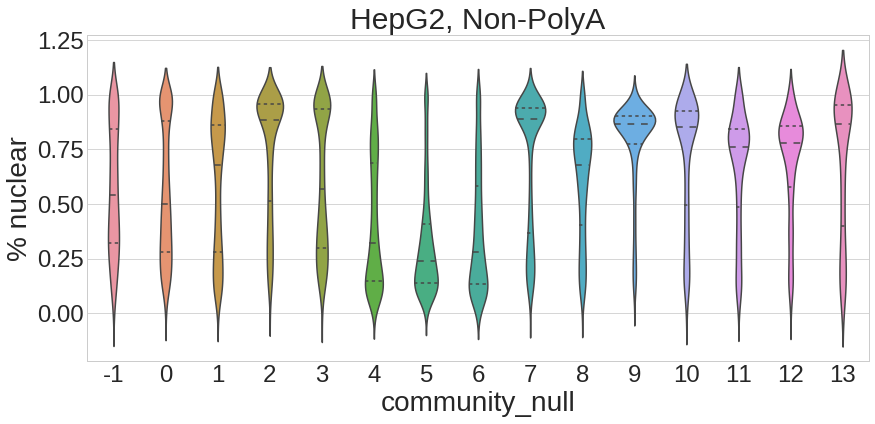

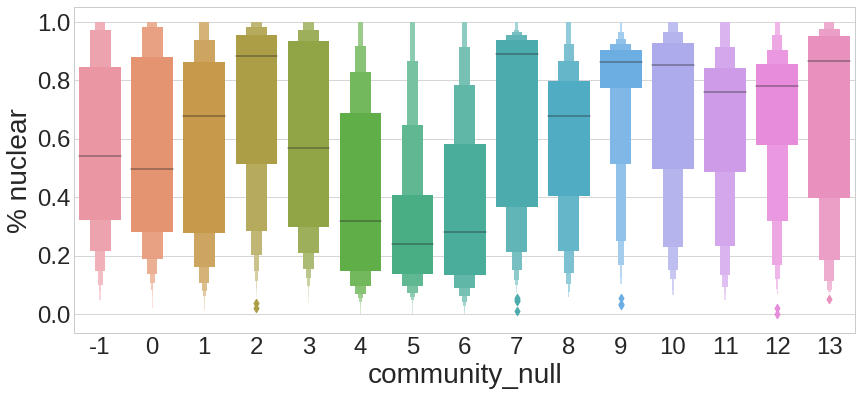

In [219]:
plotting_data = clean_data_df[(clean_data_df['cell_type'] == 'HepG2') & 
                              (clean_data_df['method'] == 'npa')]
plotting_data = plotting_data[(plotting_data['nuc_norm'] > .1) |
                              (plotting_data['cyto_norm'] > .1)]
plotting_data = plotting_data.dropna(subset=('% nuclear',), axis=0)

plt.title('HepG2, Non-PolyA')
sns.violinplot(x='community_null', 
               y='% nuclear', 
               data=plotting_data,
               inner='quartile')
plt.show()
sns.boxenplot(x='community_null', 
              y='% nuclear', 
              data=plotting_data)
plt.show()
#print(plotting_data.groupby('community_null').count()['community'])

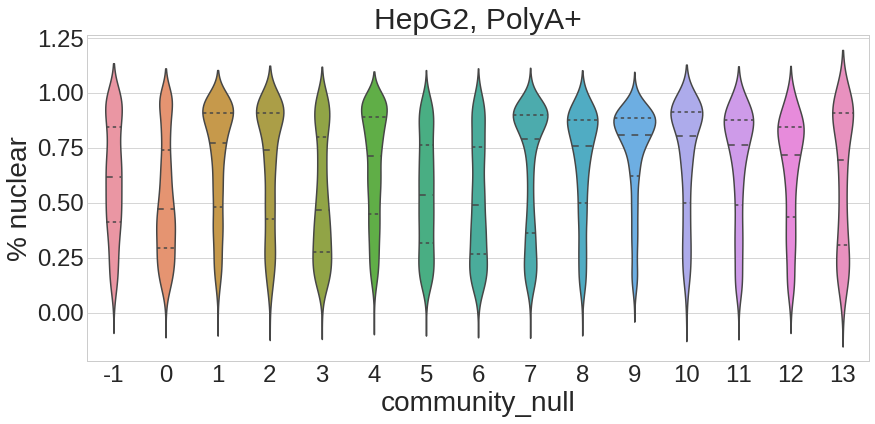

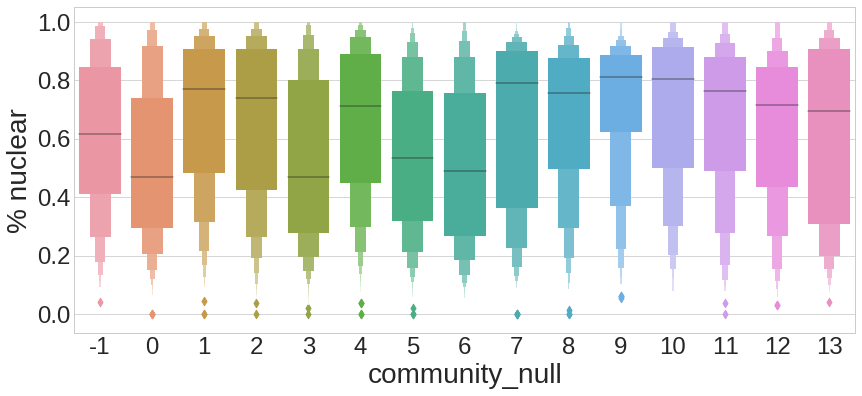

In [220]:
plotting_data = clean_data_df[(clean_data_df['cell_type'] == 'HepG2') & 
                              (clean_data_df['method'] == 'pap')]
plotting_data = plotting_data[(plotting_data['nuc_norm'] > .1) |
                              (plotting_data['cyto_norm'] > .1)]
plotting_data = plotting_data.dropna(subset=('% nuclear',), axis=0)

plt.title('HepG2, PolyA+')
sns.violinplot(x='community_null', 
               y='% nuclear', 
               data=plotting_data,
               inner='quartile')
plt.show()
sns.boxenplot(x='community_null', 
              y='% nuclear', 
              data=plotting_data)
plt.show()

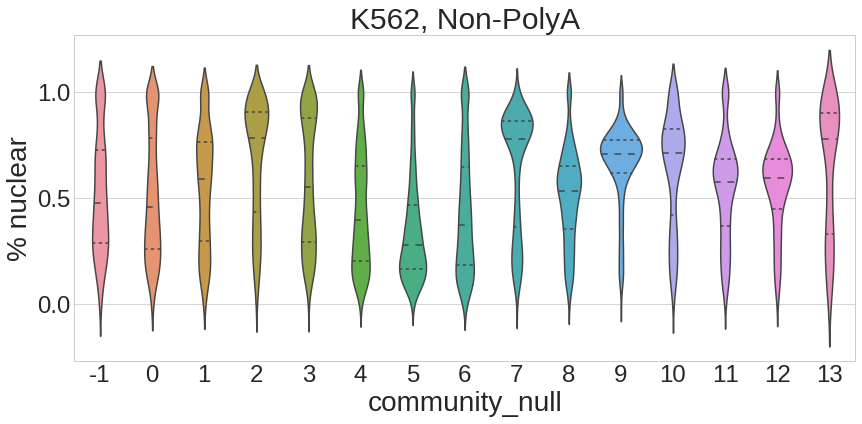

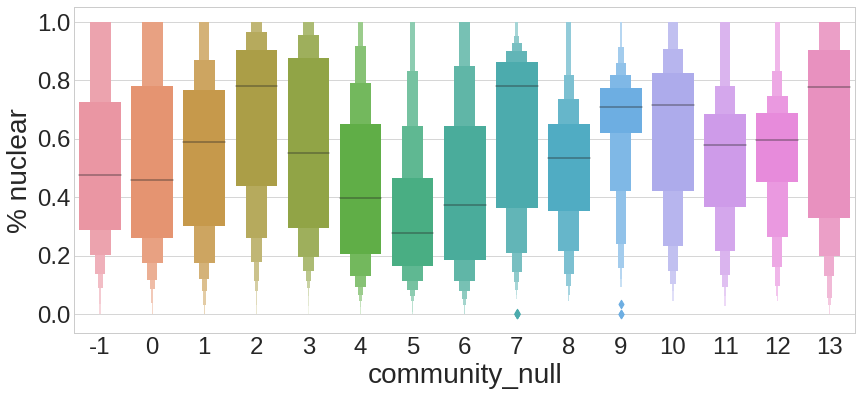

In [221]:
plotting_data = clean_data_df[(clean_data_df['cell_type'] == 'K562') & 
                              (clean_data_df['method'] == 'npa')]
plotting_data = plotting_data[(plotting_data['nuc_norm'] > .1) |
                              (plotting_data['cyto_norm'] > .1)]
plotting_data = plotting_data.dropna(subset=('% nuclear',), axis=0)

plt.title('K562, Non-PolyA')
sns.violinplot(x='community_null', 
               y='% nuclear', 
               data=plotting_data,
               inner='quartile')
plt.show()
sns.boxenplot(x='community_null', 
              y='% nuclear', 
              data=plotting_data)
plt.show()

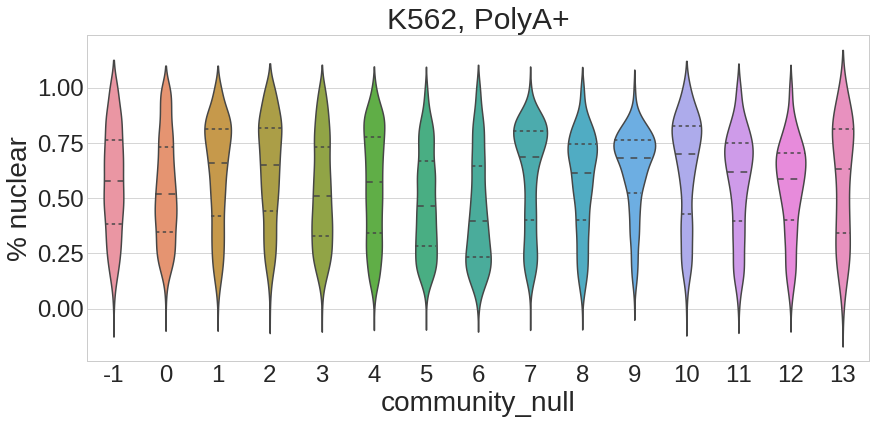

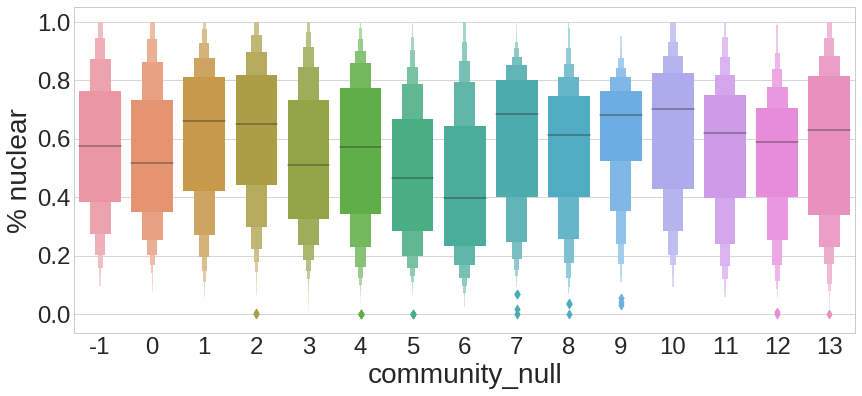

In [222]:
plotting_data = clean_data_df[(clean_data_df['cell_type'] == 'K562') & 
                              (clean_data_df['method'] == 'pap')]
plotting_data = plotting_data[(plotting_data['nuc_norm'] > .1) |
                              (plotting_data['cyto_norm'] > .1)]
plotting_data = plotting_data.dropna(subset=('% nuclear',), axis=0)

plt.title('K562, PolyA+')
sns.violinplot(x='community_null', 
               y='% nuclear', 
               data=plotting_data,
               inner='quartile')
plt.show()
sns.boxenplot(x='community_null', 
              y='% nuclear', 
              data=plotting_data)
plt.show()

## Unspliced length

I need to redo everything above and figure out what the correct length of the unspliced transcript is. David had a pretty good suggestion I'm going to implement. 

I'm going to try it first on the mouse data.

In [7]:
infile = '/home/jessime/Research/mrna_lncrna/wgEncode/megan_full_frac1_unique_named.tab'
df = pd.read_csv(infile, sep='\t')
df.head()

transcript_id        Chr            Start              End Strand  \
0  ENSMUST00000193812.1       chr1          3073253          3074322      +   
1  ENSMUST00000082908.1       chr1          3102016          3102125      +   
2            UNSPLICED0       chr1          3205901          3671498      -   
3  ENSMUST00000162897.1  chr1;chr1  3205901;3213609  3207317;3216344    -;-   
4  ENSMUST00000159265.1  chr1;chr1  3206523;3213439  3207317;3215632    -;-   

   Length  Aligned.out.sam      Norm    transcript_name  
0    1070                0  0.000000  4933401J01Rik-201  
1     110                0  0.000000        Gm26206-201  
2  465598              916  0.043478            Xkr4-un  
3    4153                0  0.000000           Xkr4-203  
4    2989                0  0.000000           Xkr4-202

In [9]:
def get_ids(path):
    unspliced_transcript_ids = []
    with open(path) as infile:
        for line in infile:
            if line.startswith('>'):
                transcript_id = line.split()[0].strip('>')
                unspliced_transcript_ids.append(transcript_id)
    return unspliced_transcript_ids

infile = '/home/jessime/Research/mrna_lncrna/M14_lnc_unspliced.fa'
lnc_un_ids = get_ids(infile)
infile = '/home/jessime/Research/mrna_lncrna/M14_pc_unspliced.fa'
pc_un_ids = get_ids(infile)
un_ids = lnc_un_ids + pc_un_ids

In [41]:
unspliced_df = df[df['transcript_id'].isin(un_ids)].copy()
print(len(un_ids))
print(unspliced_df.shape)

33535
(33535, 9)


In [42]:
new_lengths = []

for i, row in tqdm_notebook(unspliced_df.iterrows()):
    # note that i is from the original index
    offset = int(row['Start'])
    unspliced_array = np.ones(int(row['End']) - offset + 1)
    base_name = '-'.join(row['transcript_name'].split('-')[:-1])
    j = i + 1
    
    #For each spliced transcript
    while True:
        next_row = df.iloc[j]
        if next_row['transcript_name'].startswith(base_name):
            exon_starts = next_row['Start'].split(';')
            exon_ends = next_row['End'].split(';')
            
            #Mask all the exons
            for start, end in zip(exon_starts, exon_ends):
                start = int(start) - offset
                end = int(end) - offset
                unspliced_array[start: end] = 0
            j += 1
        else:
            break
    new_lengths.append(int(sum(unspliced_array)))

In [43]:
unspliced_df['old_length'] = unspliced_df['Length']
unspliced_df['Length'] = new_lengths
unspliced_df.head()

transcript_id   Chr    Start      End Strand  Length  \
0  ENSMUST00000193812.1  chr1  3073253  3074322      +    1070   
2            UNSPLICED0  chr1  3205901  3671498      -  459508   
7  ENSMUST00000195335.1  chr1  3365731  3368549      -    2819   
8  ENSMUST00000192336.1  chr1  3375556  3377788      -    2233   
9  ENSMUST00000194099.1  chr1  3464977  3467285      -    2309   

   Aligned.out.sam      Norm    transcript_name  old_length  
0                0  0.000000  4933401J01Rik-201        1070  
2              916  0.043478            Xkr4-un      465598  
7                0  0.000000        Gm37180-201        2819  
8                0  0.000000        Gm37363-201        2233  
9                0  0.000000        Gm37686-201        2309

Now let's renormalize and clean up the df

In [46]:
unique_read_count = 45249314
norm = 1E9/(unspliced_df['Length']*unique_read_count)
unspliced_df['Norm'] = unspliced_df['Aligned.out.sam']*norm
unspliced_df.drop(columns=['old_length'], inplace=True)
unspliced_df.head()

transcript_id   Chr    Start      End Strand  Length  \
0  ENSMUST00000193812.1  chr1  3073253  3074322      +    1070   
2            UNSPLICED0  chr1  3205901  3671498      -  459508   
7  ENSMUST00000195335.1  chr1  3365731  3368549      -    2819   
8  ENSMUST00000192336.1  chr1  3375556  3377788      -    2233   
9  ENSMUST00000194099.1  chr1  3464977  3467285      -    2309   

   Aligned.out.sam      Norm    transcript_name  
0                0  0.000000  4933401J01Rik-201  
2              916  0.044055            Xkr4-un  
7                0  0.000000        Gm37180-201  
8                0  0.000000        Gm37363-201  
9                0  0.000000        Gm37686-201

In [56]:
outfile = '/home/jessime/Research/mrna_lncrna/wgEncode/megan_full_unspliced.tab'
unspliced_df.to_csv(outfile, sep='\t')

In [58]:
unspliced_df[unspliced_df['transcript_name'].isin(('Xist-un', 'Airn-un'))]

transcript_id    Chr      Start        End Strand  Length  \
139073  UNSPLICED26779  chr17   12741311   12860122      +  115237   
154529  UNSPLICED30126   chrX  103460375  103483217      -    4927   

        Aligned.out.sam      Norm transcript_name  
139073            25601  4.909678         Airn-un  
154529              967  4.337424         Xist-un

# log2 transform

I want to know if performing a log2 transform on our counts improves the prediction of TETRIS repression.

In [237]:
count_file = '/home/jessime/Research/tetris/xist_mutants/6mers_xist_mutants_T.csv'
counts = pd.read_csv(count_file, index_col=0)
counts.head()

>wt  >433-434_repeat_A_delete  >435-436_repeat_a_only  \
AAAAAA  1.612210                 -0.430991                9.238240   
AAAAAG -0.648794                 -0.648794               -0.648794   
AAAAAT -0.689565                 -0.689565               -0.689565   
AAAAAC  1.180938                  0.189046                4.883071   
AAAAGA  0.237552                  0.477620               -0.658477   

        >435-318_5p_deletion  >435-798_k_min_frag  >435-800_ss3-4_delete  \
AAAAAA              1.979244             3.092613               4.925436   
AAAAAG             -0.648794            -0.648794              -0.648794   
AAAAAT             -0.689565            -0.689565              -0.689565   
AAAAAC              1.489552             2.425704               3.966796   
AAAAGA              0.398512             0.114147              -0.658477   

        >435-436_ss3-4_delete_5p_delete  \
AAAAAA                         9.260992   
AAAAAG                        -0.648794   
AAAAAT                        -0.689565   
AAAAAC                         4.895824   
AAAAGA                        -0.658477   

        >435-798D436-800_ss2_delete_in_minimal  >ss2_broad  >ss3_broad  \
AAAAAA                                4.555804    2.031109    1.966618   
AAAAAG                               -0.648794   -0.648794   -0.648794   
AAAAAT                               -0.689565   -0.689565   -0.689565   
AAAAAC                                2.258317    0.843092    1.478935   
AAAAGA                                0.434982    0.421256   -0.132751   

              ...          >435-436-RF   >88-798  >ss4_broad  >ss2_only  \
AAAAAA        ...             3.833080  2.359722    1.725602  -0.430991   
AAAAAG        ...            -0.648794 -0.648794   -0.648794  -0.648794   
AAAAAT        ...            -0.689565 -0.689565   -0.689565  -0.689565   
AAAAAC        ...             1.853192  1.809468    1.276282   2.828799   
AAAAGA        ...             0.276510 -0.046555    0.287279  -0.658477   

        >ss3_only  >ss4_only  >repeatA_only   >88-458  >88-458_del_frag  \
AAAAAA  -0.430991  -0.430991       9.238240  2.192635         -0.430991   
AAAAAG  -0.648794  -0.648794      -0.648794 -0.648794         -0.648794   
AAAAAT  -0.689565  -0.689565      -0.689565 -0.689565         -0.689565   
AAAAAC  -0.537045  -0.537045       4.883071  1.668977         -0.537045   
AAAAGA   2.392864  -0.658477      -0.658477 -0.083192          1.366628   

        >435-318_del_frag  
AAAAAA          -0.430991  
AAAAAG          -0.648794  
AAAAAT          -0.689565  
AAAAAC          -0.537045  
AAAAGA          -0.658477  

[5 rows x 29 columns]

/home/jessime/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


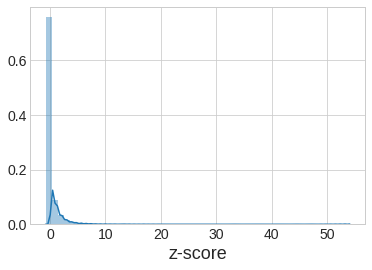

In [239]:
sns.distplot(counts.values.flatten())
plt.xlabel('z-score')
plt.show()

Yep, that looks like it could be log transformed.

1.0


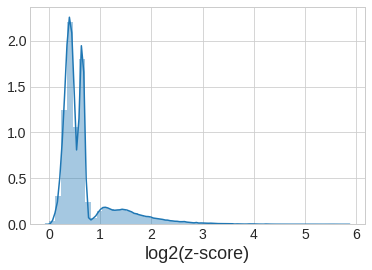

In [246]:
flat_counts = counts.values.flatten()
flat_counts += abs(min(flat_counts)) + 1
print(min(flat_counts))
sns.distplot(np.log2(flat_counts))
plt.xlabel('log2(z-score)')
plt.show()

That's not right.

In [29]:
%aimport tetris

In [30]:
infasta = '/home/jessime/Research/tetris/frags_xist18.fa'
mean = '/home/jessime/Code/old_kmers/data/M5_transcripts01_mean6.npy'
std = '/home/jessime/Code/old_kmers/data/M5_transcripts01_std6.npy'
outdir = '/home/jessime/Desktop/'
tet = tetris.Tetris(infasta, mean, std, outdir, frag_seq=False, nhmmer=False, stretcher=False, k=6)
tet.run()

Finding counts



Calculating whole-seq R-values


In [31]:
tet.align_df.head()

R_whole
xist_5.5  0.399502
Airn-1.3  0.033373
Airn-3.3  0.014039
Airn-6.2 -0.023783
Airn-7.1 -0.058753

In [16]:
luc_all_metrics = pd.read_csv('/home/jessime/Research/tetris/luc_all_metrics3.csv', index_col=0)
to_drop = ['409/7(1.8-5.5k)',
'409/7(1.8-5.5k)',
'433/434 (repeat A delete)',
'435/436 (repeat A only)',
'Xist5.5',
'EGFP',
'Renilla',
'Empty',
'Xist1.8'
]
luc_all_metrics.drop(to_drop, inplace=True)
luc_syn = luc_all_metrics[luc_all_metrics.index.str.contains('SYN')]

In [17]:
plt.style.use('seaborn-whitegrid')
sns.set_palette('colorblind')
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

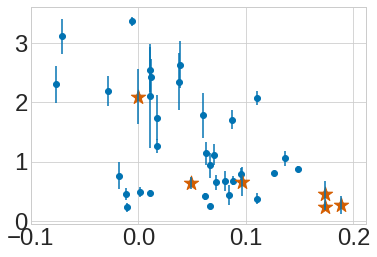

In [19]:
x = luc_all_metrics['R_seg_xist18_6']
y = luc_all_metrics['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn['R_seg_xist18_6'],
            luc_syn['Luciferase'],
            color=colors[3],
            marker='*',
            s=225)
plt.errorbar(x, y, yerr=luc_all_metrics['std'], linestyle='None')
plt.show()

In [22]:
pearsonr(x,y)

(-0.5295087015087061, 0.0005276645400486852)

In [27]:
pearsonr(luc_all_metrics['R_whole_xist18_6'],y)

(-0.5175405434197424, 0.0007405463127003076)

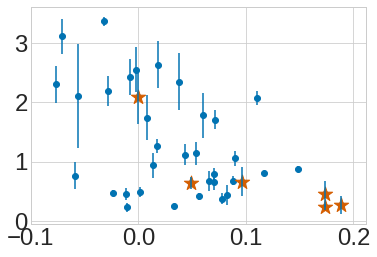

In [28]:
x = luc_all_metrics['R_whole_xist18_6']
y = luc_all_metrics['Luciferase']
plt.scatter(x, y)
plt.scatter(luc_syn['R_seg_xist18_6'],
            luc_syn['Luciferase'],
            color=colors[3],
            marker='*',
            s=225)
plt.errorbar(x, y, yerr=luc_all_metrics['std'], linestyle='None')
plt.show()

In [34]:
len(x)

39

Let's see if we can reconstruct this from the fasta file...

In [33]:
name_map = '/home/jessime/Research/tetris/name_map.txt'
name_map = pickle.load(open(name_map, 'rb'))
len(name_map)

30

In [41]:
name_map_rev = {v:k for k,v in name_map.items()}
len(name_map_rev)

30

In [46]:
r_whole_subset = []
for frag in x.index:
    try:
        r = tet.align_df.loc[frag]['R_whole']
    except KeyError:
        frag = name_map_rev[frag]
        r = tet.align_df.loc[frag]['R_whole']
    r_whole_subset.append(r)

In [51]:
print(r_whole_subset)

[-0.070943564, 0.10993908, -0.02811763, 0.053491477, -0.03189983, -0.05658189, 0.033373214, 0.014039332, -0.023782792, -0.058752753, 0.14815246, -0.07643202, 0.11718431, 0.018388843, -0.0023351926, 0.0010765521, 0.008313652, 0.078244045, 0.089806154, -0.007919554, 0.07057905, 0.082367934, 0.055969924, 0.06041631, 0.037495337, 0.06609489, 0.07040465, 0.07121721, 0.042987622, -0.010307405, 0.088023186, 0.18883501, 0.17411238, 0.17344818, 0.096463546, 0.04918845, -0.00029594498, -0.011456867, 0.017036533]


In [49]:
print(x.values)

[-0.07094356  0.10993908 -0.02811763  0.05349148 -0.03189983 -0.05658189
  0.03337321  0.01403933 -0.02378279 -0.05875275  0.14815246 -0.07643202
  0.11718431  0.01838884 -0.00233519  0.00107655  0.00831365  0.07824405
  0.08980615 -0.00791955  0.07057905  0.08236793  0.05596992  0.06041631
  0.03749534  0.06609489  0.07040465  0.07121721  0.04298762 -0.01030741
  0.08802319  0.18883501  0.17411238  0.17344818  0.09646355  0.04918845
 -0.00029594 -0.01145687  0.01703653]


Okay, that looks good. Now, lets see if I can do the log2 transform.


1.768871009349823


/home/jessime/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


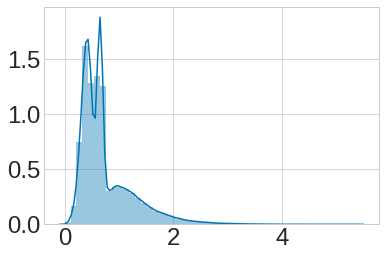

In [54]:
tet2 = tetris.Tetris(infasta, mean, std, outdir, frag_seq=False, nhmmer=False, stretcher=False, k=6)
tet2.make_kmer_counts()

flat_counts2 = tet2.counter.counts.flatten()
offset = abs(min(flat_counts2)) + 1
flat_counts2 += offset
print(offset)
sns.distplot(np.log2(flat_counts2))

In [55]:
tet2.counter.counts = np.log2(tet2.counter.counts + offset)
tet2.make_dist()

At this point, I've "hacked in", log2 transformed the counts, and have the pearsons to Xist-2kb. 

In [57]:
tet2.align_df

R_whole
xist_5.5                     0.533023
Airn-1.3                     0.038104
Airn-3.3                     0.023617
Airn-6.2                    -0.025792
Airn-7.1                    -0.072643
Kcnq-2.2                     0.092048
Kcnq-3.3                    -0.008942
Neat1-2.3                    0.075132
Malat1-2.1                   0.074354
Meg3-2.3                     0.054775
Kcnq-3-m-                    0.005731
Kcnq-4-m-                   -0.061219
Kcnq-1-m-                    0.084633
Rosa26                       0.078384
Gm28320                     -0.002025
Gm26666                      0.013492
Malat-full                   0.074639
Neat1-full                   0.073484
MC1279.rar1                  0.187874
MC1280.rar2                  0.208096
MC1281.rar3                  0.118779
MC1431.enr2                  0.008393
MC1432.rar4                  0.197226
MC1433.rar5                  0.066709
x1.8_noUmer_a_replace        0.916452
x1.8_noUmer_U_replace        0.946660
xist2_5.5                    0.163221
egfp                         0.019763
renilla_luciferase           0.022691
N14-3.1-hoxa11os-_unspliced  0.067471
...                               ...
N14-2-hoxaas2-_w_intron      0.077092
N14-2-hoxaas2-_spliced       0.066785
Pvt1                        -0.002557
hottip                       0.005578
Air1-ms                     -0.045196
Air3-ms                     -0.054561
xist-delta-repeatA           0.894691
xist-repeatA-only            0.485287
hotairm1-iso                -0.011334
tbcb1a                       0.064635
linc00651                    0.036606
no-umer-min                  0.748729
wutz-synthetic-min           0.671450
notumos                      0.073392
Gm15882                     -0.084079
Gm33354                     -0.050747
493057O11Rik                -0.011849
Gm37319                      0.024256
5730488B01Rik                0.062951
Gm10524                      0.083511
Gm20628                      0.126385
1700047n06rik               -0.062573
1810010K12Rik                0.088639
Gm14964                      0.162543
Gm29100                      0.092320
pCL121-l19rik                0.000442
pCl170-spliced-trerna1       0.036606
pCL170-genomic-trerna1       0.021279
xist-minimal                 0.796945
xist_1.8                     1.000000

[62 rows x 1 columns]

all of these numbers look reasonable.

In [58]:
log2_subset = []
for frag in x.index:
    try:
        r = tet2.align_df.loc[frag]['R_whole']
    except KeyError:
        frag = name_map_rev[frag]
        r = tet2.align_df.loc[frag]['R_whole']
    log2_subset.append(r)

In [59]:
print(log2_subset)

[-0.06257347, 0.08863899, -0.011848628, 0.06295061, -0.045195684, -0.054561134, 0.0381044, 0.02361678, -0.0257921, -0.072643444, 0.16254252, -0.08407879, 0.1263854, 0.0134916995, -0.0020252299, 0.024256337, 0.0055777226, 0.08463266, 0.09204772, -0.008941675, 0.074639454, 0.07435382, 0.054775488, 0.06678497, 0.054690823, 0.0734843, 0.07513171, 0.07339239, 0.05562307, -0.0025566379, 0.07838383, 0.20809631, 0.19722603, 0.18787351, 0.11877854, 0.06670911, 0.00839347, 0.00044194143, 0.03660647]


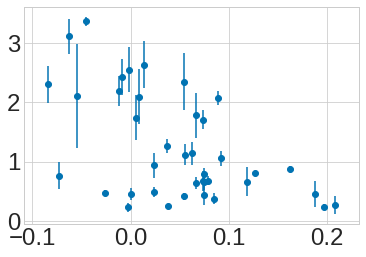

In [60]:
y = luc_all_metrics['Luciferase']
plt.scatter(log2_subset, y)
plt.errorbar(log2_subset, y, yerr=luc_all_metrics['std'], linestyle='None')
plt.show()

In [61]:
pearsonr(log2_subset, y)

(-0.539869544584315, 0.0003894585734843654)

We should use a log2 transform.

# Protein binding

We're going to redo the protein binding logistic regression experiment. It's going to be a lot bigger this time. We've got an addition ~50 experiments and a LOT more transcripts. Here's the url where I got all of the bed files:

https://www.encodeproject.org/matrix/?type=Experiment&x.limit=&assay_title=eCLIP&organ_slims%21=adrenal+gland&files.file_type=bed+narrowPeak

Clicking the download button gives this message:


>Click the “Download” button below to download a “files.txt” file that contains a list of URLs to a file containing all the experimental metadata and links to download the file. The first line of the file will always be the URL to download the metadata file. 
Further description of the contents of the metadata file are described in the Batch Download help doc.
The “files.txt” file can be copied to any server.
The following command using cURL can be used to download all the files in the list:
`xargs -n 1 curl -O -L < files.txt`

In [138]:
!mkdir /home/jessime/Research/proteins/new_eCLIP

(I also tried with bigbed, so let's fix that)

In [141]:
!mv /home/jessime/Research/proteins/new_eCLIP/files.txt \
/home/jessime/Research/proteins/new_eCLIP/bigbed_files.txt

In [142]:
!mv /home/jessime/Desktop/files.txt /home/jessime/Research/proteins/new_eCLIP/

In [143]:
!head /home/jessime/Research/proteins/new_eCLIP/files.txt

https://www.encodeproject.org/metadata/type=Experiment&x.limit=&assay_title=eCLIP&organ_slims%21=adrenal+gland&files.file_type=bed+narrowPeak/metadata.tsv
https://www.encodeproject.org/files/ENCFF865AZP/@@download/ENCFF865AZP.bed.gz
https://www.encodeproject.org/files/ENCFF774EDY/@@download/ENCFF774EDY.bed.gz
https://www.encodeproject.org/files/ENCFF913UPA/@@download/ENCFF913UPA.bed.gz
https://www.encodeproject.org/files/ENCFF944XFZ/@@download/ENCFF944XFZ.bed.gz
https://www.encodeproject.org/files/ENCFF593CEQ/@@download/ENCFF593CEQ.bed.gz
https://www.encodeproject.org/files/ENCFF933AGU/@@download/ENCFF933AGU.bed.gz
https://www.encodeproject.org/files/ENCFF353XWS/@@download/ENCFF353XWS.bed.gz
https://www.encodeproject.org/files/ENCFF990UNN/@@download/ENCFF990UNN.bed.gz
https://www.encodeproject.org/files/ENCFF545NBF/@@download/ENCFF545NBF.bed.gz
